In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams["axes.grid"] = True

def plot_state(X, centroids, labels, title):
    cluster_colors = ['tab:green', 'tab:blue']
    fig, ax = plt.subplots(figsize=(6, 5))

    for i in range(centroids.shape[0]):
        pts = X[labels == i]
        ax.scatter(pts[:, 0], pts[:, 1], s=60, alpha=0.9,
                   color=cluster_colors[i % 2], label=f"Кластер {i+1}")
        
    ax.scatter(centroids[:, 0], centroids[:, 1],
               s=90, c='red', marker='o',
               label='Центроиды')

    ax.set_title(title)
    ax.set_aspect('equal', adjustable='datalim')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.show()

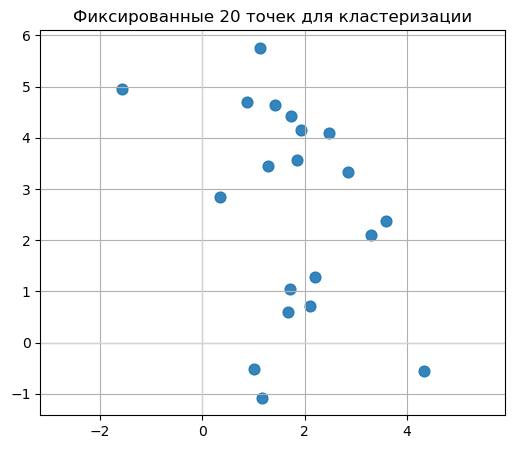

In [2]:
#   Зададим данные

# фиксируем 20 точек
points = [
    (1.84, 3.56), (1.01, -0.52), (1.29, 3.45), (1.93, 4.15),
    (2.84, 3.33), (1.42, 4.64), (0.87, 4.71), (2.21, 1.28),
    (4.33, -0.56), (-1.58, 4.96), (2.10, 0.71), (1.17, -1.08),
    (3.59, 2.37), (1.12, 5.76), (1.67, 0.60), (3.29, 2.10),
    (1.71, 1.05), (0.35, 2.85), (2.47, 4.10), (1.74, 4.43)
]

X = np.array(points)

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X[:,0], X[:,1], s=60, alpha=0.9)
ax.set_title("Фиксированные 20 точек для кластеризации")
ax.axhline(0, color="lightgray", linewidth=1)
ax.axvline(0, color="lightgray", linewidth=1)
ax.set_aspect('equal', adjustable='datalim')
plt.show()


In [3]:
#   Функции для K-means

# определение центров кластеров (рандомно)
def init_centroids(X, k):
    n = X.shape[0]
    idx = np.random.choice(n, size=k, replace=False)
    return X[idx].copy()

# каждой точке назначаем ближайший центр
def assign_clusters(X, centroids):
    # матрица расстояний (квадраты евклидовых расстояний)
    d2 = ((X[:, None, :] - centroids[None, :, :])**2).sum(axis=2)
    labels = d2.argmin(axis=1)
    return labels

# пересчитываем центры как среднее по кластеру
def recompute_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        pts = X[labels == i]
        if len(pts) > 0:
            centroids[i] = pts.mean(axis=0)
        else:
            # если кластер пустой — перекинем центр в случайную точку
            centroids[i] = X[np.random.choice(X.shape[0])]
    return centroids

# сумма квадратов расстояний до ближацшего центра
def inertia(X, centroids, labels):
    return ((X - centroids[labels])**2).sum()



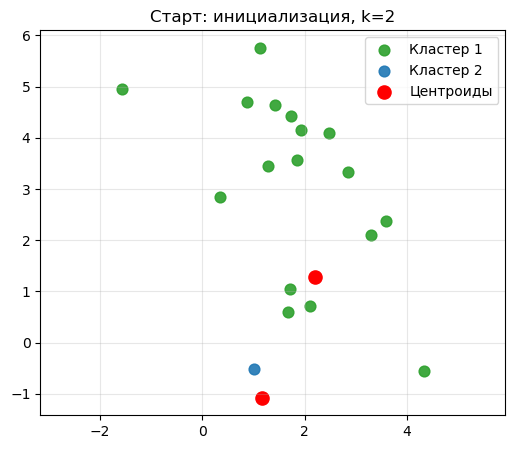

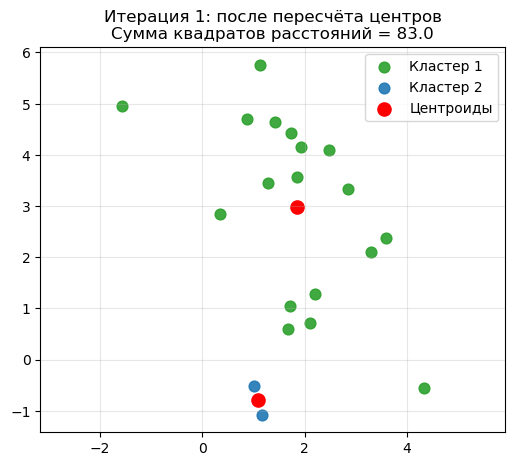

Итерация 1: сдвиг центров = 1.755156


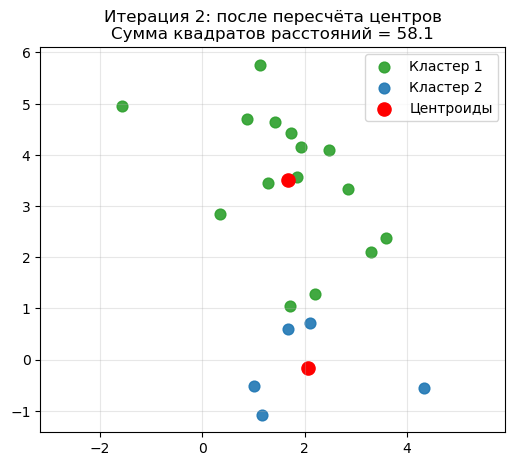

Итерация 2: сдвиг центров = 1.286729


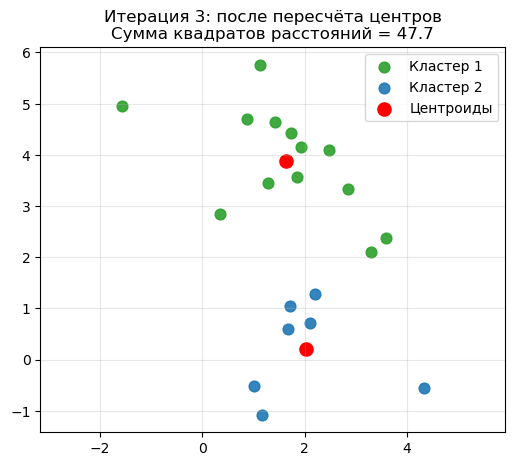

Итерация 3: сдвиг центров = 0.528219


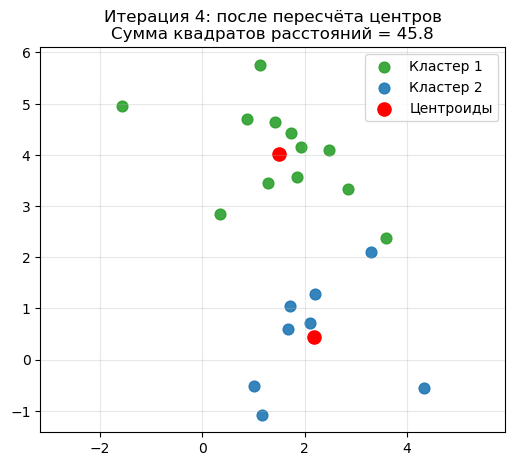

Итерация 4: сдвиг центров = 0.348869


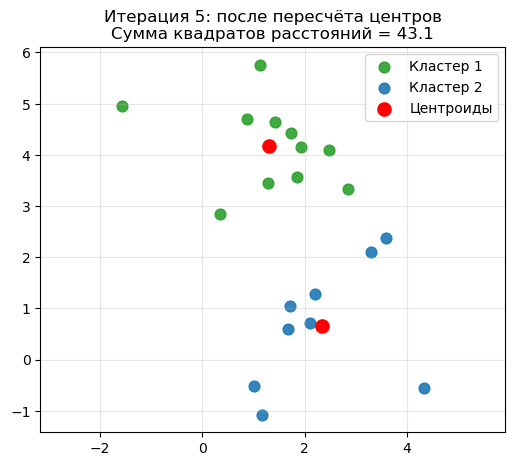

Итерация 5: сдвиг центров = 0.359253


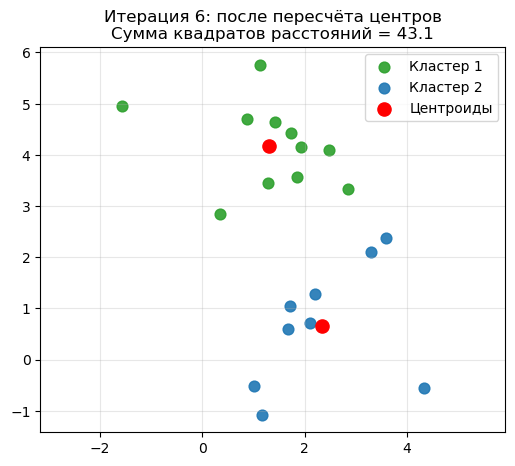

Итерация 6: сдвиг центров = 0.000000
Сходимость достигнута


In [5]:
#   На каждом шаге показываем кластеры и их центры.
#   Остановится после сходимости (центры больше не меняются или достигнут лимит итераций - 10).

def kmeans_stepwise(X, k=2, max_iter=10, tol=1e-6, verbose=True):
    # определение центров кластеров (рандомно)
    centroids = init_centroids(X, k)
    # каждой точке назначаем ближайший центр
    labels = assign_clusters(X, centroids)
    plot_state(X, centroids, labels, f"Старт: инициализация, k={k}")

    for it in range(1, max_iter + 1):
        # каждой точке назначаем ближайший центр
        labels = assign_clusters(X, centroids)
        # пересчитываем центры как среднее по кластеру
        new_centroids = recompute_centroids(X, labels, k)
        # Визуализация
        plot_state(
            X, new_centroids, labels,
            f"Итерация {it}: после пересчёта центров\nСумма квадратов расстояний = {inertia(X, new_centroids, labels):.1f}"
        )
        # Критерий остановки
        # сдвиг центров = корень из суммы квадратов всех изменений
        shift = np.linalg.norm(new_centroids - centroids)
        if verbose:
            print(f"Итерация {it}: сдвиг центров = {shift:.6f}")
        if shift < tol:
            print("Сходимость достигнута")
            centroids = new_centroids
            break
        centroids = new_centroids
    return centroids, labels

centroids, labels = kmeans_stepwise(X, k=2, max_iter=10)
